
# **Imports:**

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorflow.keras import layers
# from google.colab import files
# import os
# import copy
# import cv2
# import random
# from sklearn import model_selection
# from sklearn import preprocessing
# import keras
# from keras import layers
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image
# import cv2
# import os
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input, LSTM
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import os
# from sklearn.preprocessing import MinMaxScaler

In [2]:
import requests
import math
import time
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt


# **Methods:**

In [3]:
def url_generator(stock_index: str, interval: str, yyyy_mm_dd: str) -> str:
  return f"https://stooq.pl/q/a2/d/?s={stock_index}&i={interval}&f={yyyy_mm_dd}"

def parse_stock_data(txt_data: str) -> list:
  lista = txt_data.split()
  ret = []
  for x in lista:
    a = x.split(',')
    ret.append({"Date":a[0], "Time":a[1], "Open":float(a[2]), "High":float(a[3]), "Low":float(a[4]), "Close":float(a[5])})
  return ret

def print_number(liczba):
    return "{:.2f}".format(liczba)

In [4]:
def get_operation(stock_values: list):
  # return random.choice([0, 1, -1])
  return random.randint(-1, 1)


In [5]:
def plot_chart(chart_values):
  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")

def plot_chart_with_operations(chart_values, operation_list):
  if len(chart_values) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")

  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")

  for i, operation in enumerate(operation_list):
    if operation > 0:
      plt.plot(i, chart_values[i], "go")
    if operation < 0:
      plt.plot(i, chart_values[i], "ro")

https://stooq.pl/q/a2/d/?s=usdpln&i=d&f=20240416
[3.65935, 3.6911, 3.68402]


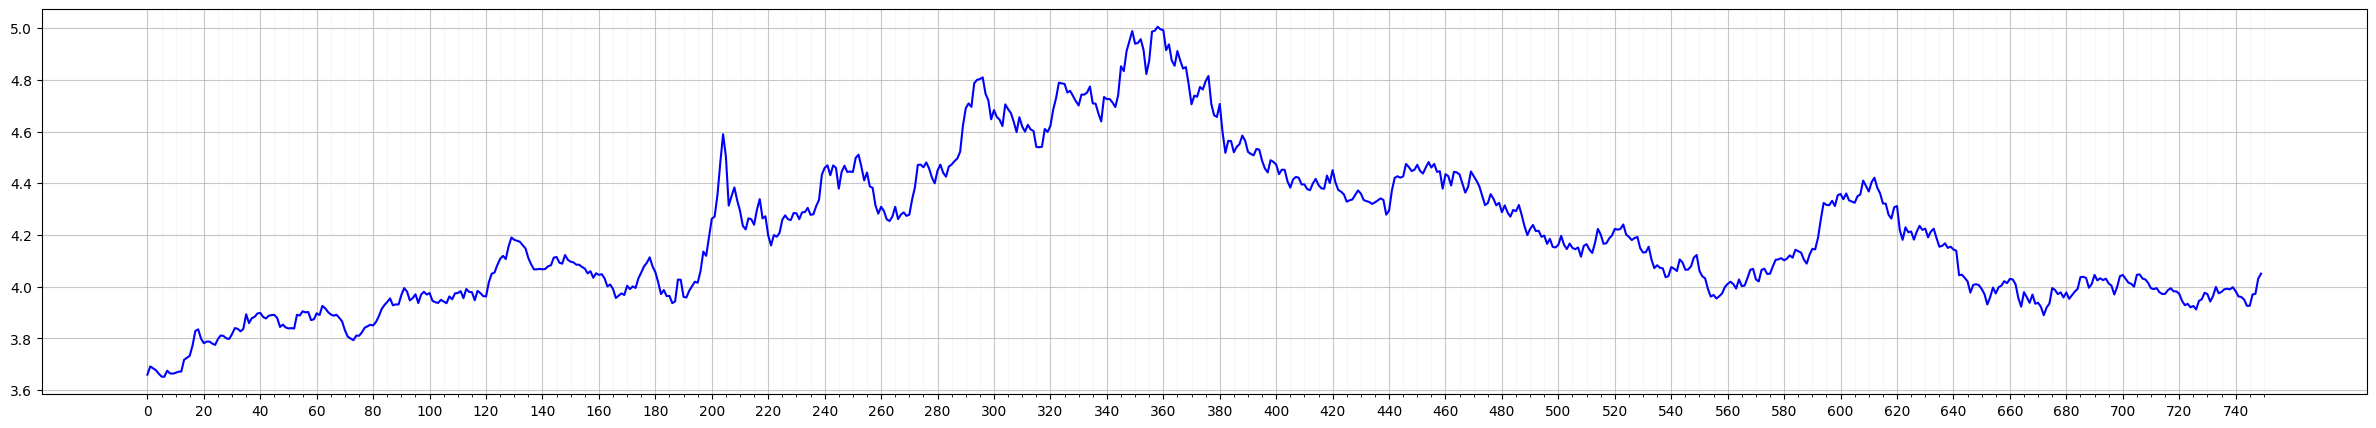

In [6]:
now = datetime.datetime.now()
stock_index = "usdpln"
yyyy_mm_dd = f"{now.year:04d}{now.month:02d}{now.day:02d}"
url = url_generator(stock_index, "d", yyyy_mm_dd)
print(url)
resp = requests.get(url)
row_list = parse_stock_data(resp.text)

stooq_vals = [x["Close"] for x in row_list]
print(stooq_vals[:3])
plot_chart(stooq_vals)

In [9]:
def main():
  account_balance = 0
  stoock_number = 0
  operation_history = []
  account_balance_history = []
  stoock_number_history = []
  money_history = []
  operation_size = 100

  last_stock_val = stooq_vals[-1]
  for stock_val in stooq_vals:
    prev_val = []
    operation = get_operation(prev_val)     # 1 0 -1

    if operation == 1: # buy
      how_much_stocks_can_we_buy = int(operation_size/stock_val)
      account_balance -= how_much_stocks_can_we_buy * stock_val
      stoock_number   += how_much_stocks_can_we_buy

    if operation == -1: # sell
      how_much_stocks_can_we_buy = int(operation_size/stock_val)
      account_balance += how_much_stocks_can_we_buy * stock_val
      stoock_number   -= how_much_stocks_can_we_buy

    operation_history.append(operation)
    account_balance_history.append(account_balance)
    stoock_number_history.append(stoock_number)
    money_history.append(account_balance + (stoock_number*last_stock_val))

  return [account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history]


account_balance: 1044.88
stoock_number:   -245.00
after all:       52.63


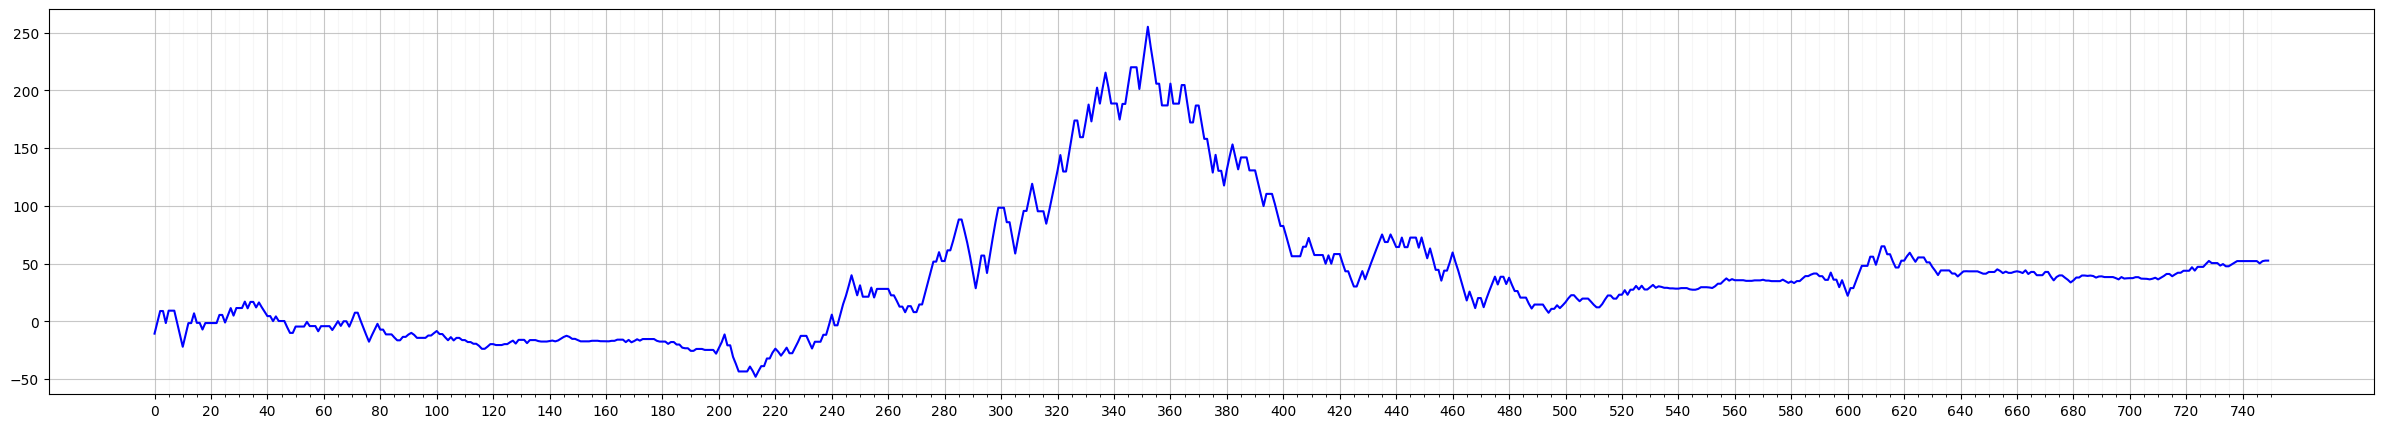

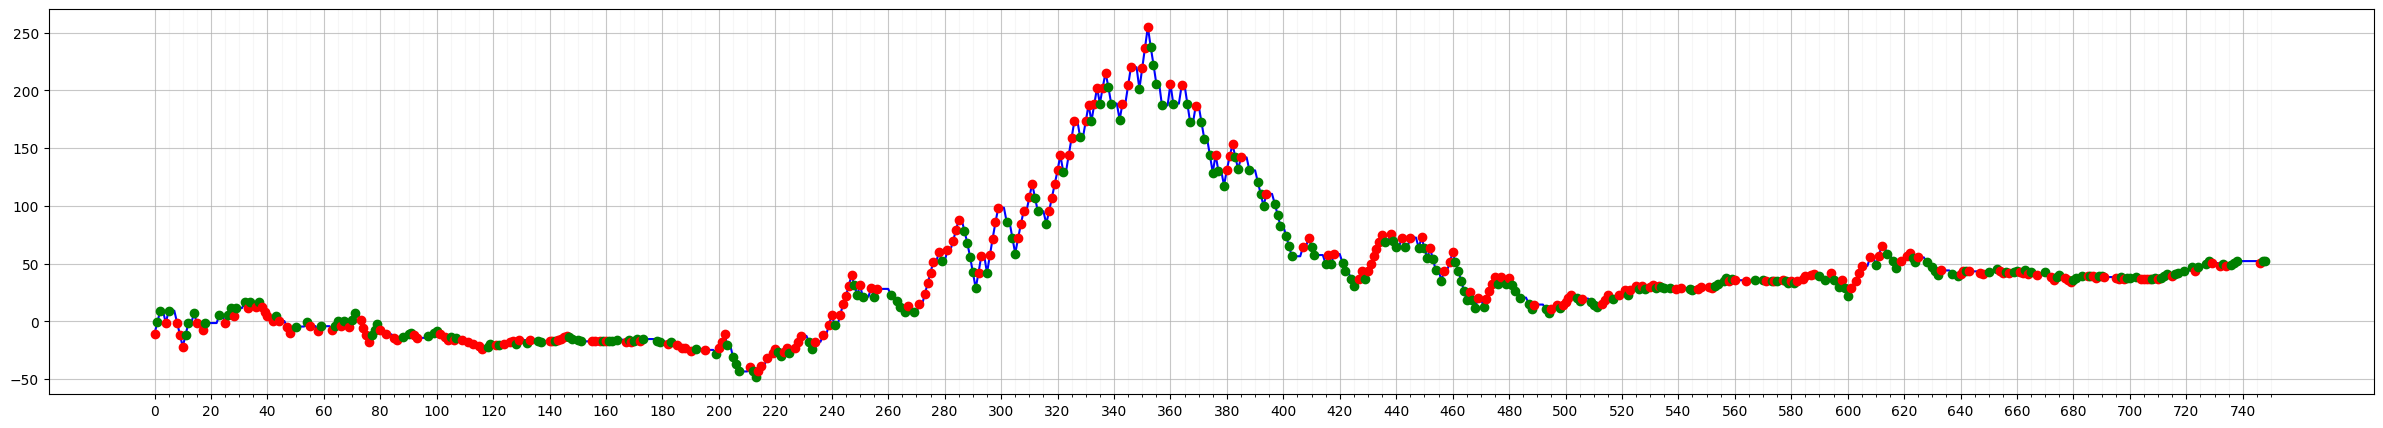

In [12]:
[account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history] = main()

print(f"account_balance: {print_number(account_balance)}")
print(f"stoock_number:   {print_number(stoock_number)}")
print(f"after all:       {print_number(account_balance + (stoock_number*stooq_vals[-1]))}")

plot_chart(money_history)
plot_chart_with_operations(money_history, operation_history)


In [11]:
# test 100x

min_money = 0
max_money = 0

for i in range(100):
  [account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history] = main()
  end_money = money_history[-1]
  max_money = max(max_money, end_money)
  min_money = min(min_money, end_money)
  # plot_chart(money_history)
  # print(len(money_history))
  # time.sleep(1)

print(f"max_money: {print_number(max_money)}")
print(f"min_money:   {print_number(min_money)}")

max_money: 537.29
min_money:   -389.48
